In [4]:
# load from json
import json
from pprint import pprint
import numpy as np
with open('wheel_setting.json', 'r') as f:
    Wheel_setting = json.load(f)
# pprint(Wheel_setting)
L = abs(Wheel_setting['wheels'][0]['position']['y'] - Wheel_setting['wheels'][2]['position']['y'])
T = abs(Wheel_setting['wheels'][0]['position']['x'] - Wheel_setting['wheels'][1]['position']['x'])
theta1 = np.radians(69.99)
theta2 = np.radians(47.95)

R = (L/np.sin(theta2) + np.sqrt((L/np.tan(theta1) + T)**2 + L**2))/2
R, L, T

(406.345498866564, 300.464477, 166.682792)

# Relation between params

In [7]:
# transform data/log to xlsx
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pprint import pprint

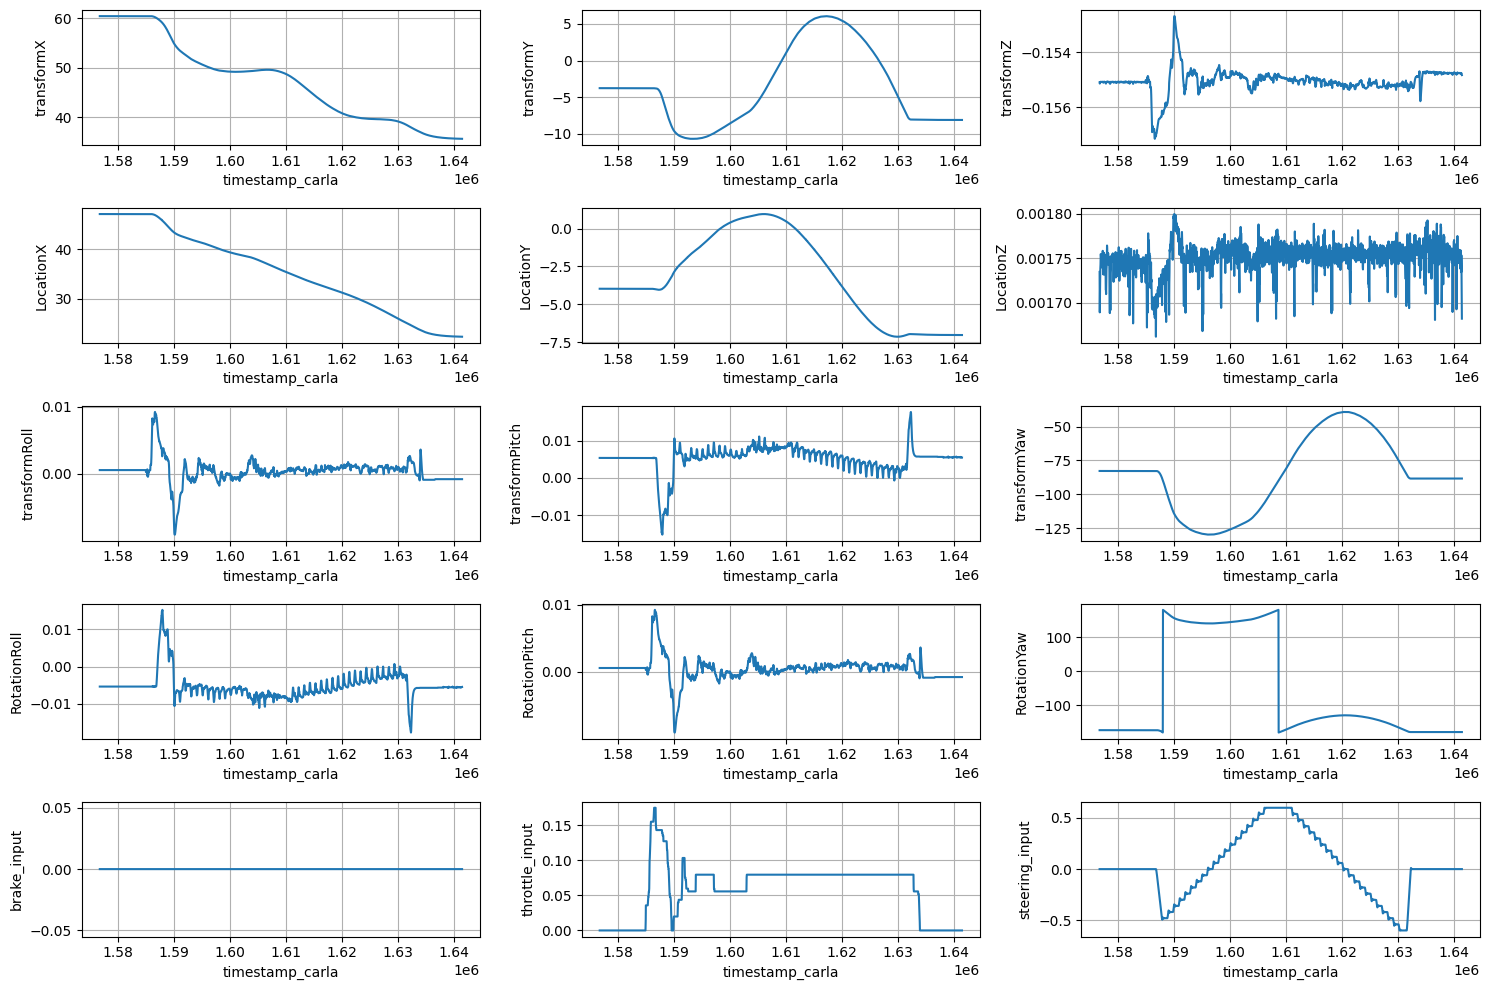

In [62]:
columns =  ['transformX', 'transformY', 'transformZ',
            'LocationX', 'LocationY',  'LocationZ',
            'transformRoll', 'transformPitch', 'transformYaw',
            'RotationRoll', 'RotationPitch', 'RotationYaw',
            'VelocityX', 'VelocityY', 'VelocityZ',
            'AngularVelocityX', 'AngularVelocityY', 'AngularVelocityZ',
            'brake_input', 'throttle_input', 'steering_input',
           ]

def plot_data_with_timestamp(df, headers = columns):
    plt.style.use('default')
    plt.figure(figsize=(15, 10))
    
    plot_columns = []
    for col in headers:
        if col in df.columns:
            plot_columns.append(col)

    cols = 3
    rows = int(len(plot_columns) // cols)
    for i in range(len(plot_columns)):
        plt.subplot(rows, cols, i+1)
        plt.plot(df['timestamp_carla'], df[plot_columns[i]])
        plt.xlabel('timestamp_carla')
        plt.ylabel(plot_columns[i])
        
        plt.tight_layout()
        plt.grid()
        
    plt.show()
    plt.close()
    
df = pd.read_excel('./data/vehicle_logs/log_forward.xlsx')
plot_data_with_timestamp(df, headers=columns)

### Plot the path from trial files

P_s: 	 -2.21546435 	 -31.60477066
P_d: 	 1.03518212 	 -18.32664871
P_f: 	 -7.7015214 	 -21.18217278


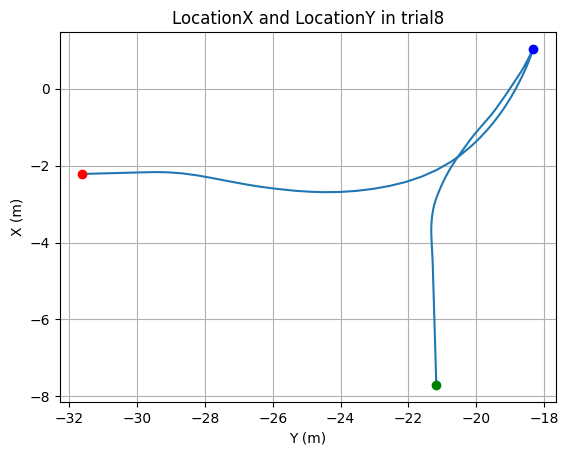

In [79]:
# plot locationX and Y

df = pd.read_excel('./data/trials/trial8.xlsx')
x = df['LocationX'].to_list()
y = df['LocationY'].to_list()
plt.plot(y, x)
plt.xlabel('Y (m)')
plt.ylabel('X (m)')
plt.plot(y[0], x[0], 'ro')
plt.plot(y[x.index(min(x))], min(x), 'go')
# find plot the turning point
plt.plot(y[x.index(max(x))], max(x), 'bo')

print("P_s: \t", x[0],  "\t", y[0])
print("P_d: \t", max(x),"\t", y[x.index(max(x))])
print("P_f: \t", min(x),"\t", y[x.index(min(x))])


plt.title('LocationX and LocationY in trial8')
plt.grid()
plt.show()
plt.close()

## Plots from wheel sensor data

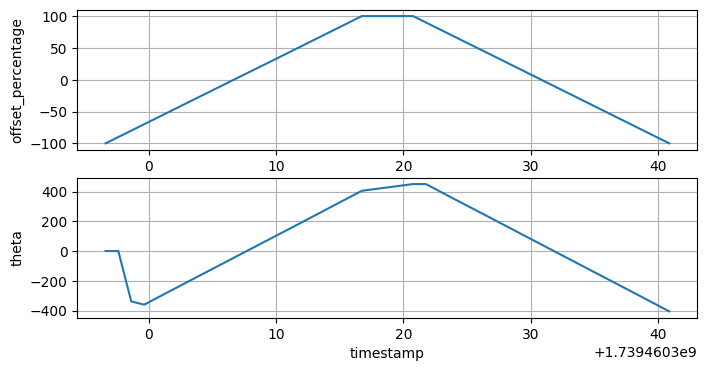

1260


In [ ]:
df_spin = pd.read_excel('./data/spin_test_offset4.xlsx')
plt.style.use('default')
df_spin_repeated = df_spin.loc[df_spin.index.repeat(30)].reset_index(drop=True)
df_spin_repeated['timestamp_carla'] = df["timestamp_carla"]
df_spin_repeated['wheel_angle'] =  df_spin_repeated['x-axis positions'] * 450 / 32767
plt.figure(figsize=(8, 4))
plt.subplot(2, 1, 1)
plt.plot(df_spin_repeated['timestamp'], df_spin_repeated['offset_percentage'])
plt.xlabel('timestamp')
plt.ylabel('offset_percentage')
plt.grid()
plt.subplot(2, 1, 2)
plt.plot(df_spin_repeated['timestamp'], df_spin_repeated['x-axis positions'] * 450 / 32767)
plt.xlabel('timestamp')
plt.ylabel('theta')
plt.grid()
plt.show()
print(len(df_spin_repeated))

## Plots the relationship between measured data
1. Input: (logitech) steering wheel angle offset ~ Measured: (logitech) steering wheel angle
2. Input: (logitech) steering wheel angle ~ Measured: (carla) steering input
3. Input: (carla) steering input ~ Measured: (carla) steering angle 
4. Input: (carla) steering angle ~ Measured: change of yaw angles (vehicle angle)

Linear Relation: Y = 0.000511 * X + 0.030352


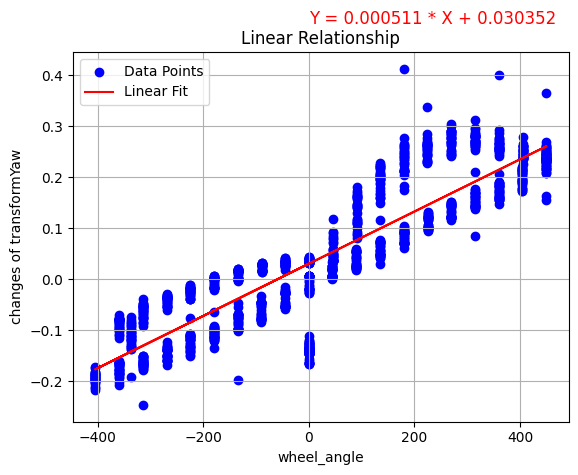

In [545]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

df = pd.read_excel('./data/log_9.xlsx')
df = df.iloc[410:410+42*30]
# df = df.iloc[310:310+42*30]

# Extract X and Y
X = df_spin_repeated[['wheel_angle']]  # Feature must be 2D
Y = df['transformYaw'].diff().fillna(0)  # Target can be 1D
# Linear Regression Model
model = LinearRegression()
model.fit(X, Y)

# Coefficient and Intercept
slope = model.coef_[0]
intercept = model.intercept_

print(f"Linear Relation: Y = {slope:.6f} * X + {intercept:.6f}")

# Predicted Y values
Y_pred = model.predict(X)

# Plot the data and linear fit
# show equation on the plot

plt.scatter(X, Y, color='blue', label='Data Points')
plt.plot(X, Y_pred, color='red', label='Linear Fit')
plt.text(0.1, 0.5, f'Y = {slope:.6f} * X + {intercept:.6f}', fontsize=12, color='red')
plt.xlabel('wheel_angle')
plt.ylabel('changes of transformYaw')
plt.title('Linear Relationship')
plt.legend()
plt.grid(True)
plt.show()


## **Bezier curve**



In [7]:
from bezier_path import *
import matplotlib.pyplot as plt
plt.style.use('default')

P_0 = [-147.066772, -1322.415039] # [y, x]
P_f = [-687.066772, -2162.415039]
P_d = [-37.066772 , -2902.415039]

yaw_0 = 0
yaw_d = 10
yaw_f = 90

vel = 2.0 # km/h

# #plot points
# plt.figure()

# plt.plot(P_0[1], P_0[0], 'go')
# plt.plot(P_d[1], P_d[0], 'bo')
# plt.plot(P_f[1], P_f[0], 'ro')
# plt.grid()

# plt.show()

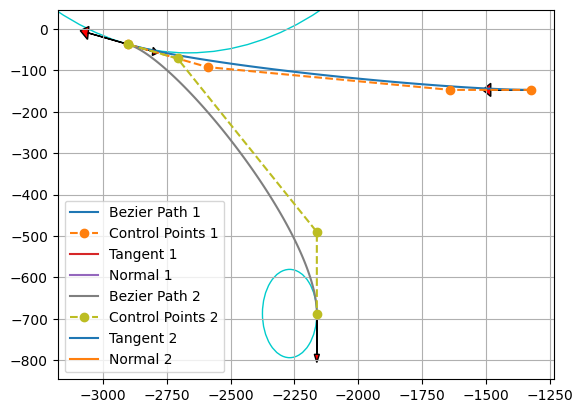

In [8]:
n_points = 100
path1, control_points1, params1 = calculate_bezier_trajectory(
    start_pos=P_0[::-1],
    end_pos=P_d[::-1],
    start_yaw=yaw_0,
    end_yaw=yaw_d,
    n_points=n_points,
    turning_radius=R,
    show_animation=False,
)
# backward so reverse the yaw angle (+180)
path2, control_points2, params2 = calculate_bezier_trajectory(
    start_pos=P_d[::-1],
    end_pos=P_f[::-1],
    start_yaw=180 + yaw_d,
    end_yaw=180 + yaw_f,
    n_points=n_points,
    turning_radius=R,
    show_animation=False,
)

# show 2 path in same plot
plt.figure()
plt.plot(path1.T[0], path1.T[1], label="Bezier Path 1")
plt.plot(control_points1.T[0], control_points1.T[1], "--o", label="Control Points 1")
plt.plot(params1["x_target"], params1["y_target"])
plt.plot(params1["tangent"][-1][:, 0], params1["tangent"][-1][:, 1], label="Tangent 1")
plt.plot(params1["normal"][-1][:, 0], params1["normal"][-1][:, 1], label="Normal 1")
plt.gca().add_artist(params1["circle"])
plot_arrow(
    params1["start_x"],
    params1["start_y"],
    np.pi - params1["start_yaw"],
    length=0.1 * params1["dist"],
    width=0.02 * params1["dist"],
)
plot_arrow(
    params1["end_x"],
    params1["end_y"],
    np.pi - params1["end_yaw"],
    length=0.1 * params1["dist"],
    width=0.02 * params1["dist"],
)

plt.plot(path2.T[0], path2.T[1], label="Bezier Path 2")
plt.plot(control_points2.T[0], control_points2.T[1], "--o", label="Control Points 2")
plt.plot(params2["x_target"], params2["y_target"])
plt.plot(params2["tangent"][-1][:, 0], params2["tangent"][-1][:, 1], label="Tangent 2")
plt.plot(params2["normal"][-1][:, 0], params2["normal"][-1][:, 1], label="Normal 2")
plt.gca().add_artist(params2["circle"])
plot_arrow(
    params2["start_x"],
    params2["start_y"],
    np.pi - params2["start_yaw"],
    length=0.1 * params2["dist"],
    width=0.02 * params2["dist"],
)
plot_arrow(
    params2["end_x"],
    params2["end_y"],
    np.pi - params2["end_yaw"],
    length=0.1 * params2["dist"],
    width=0.02 * params2["dist"],
)

plt.legend()
plt.grid(True)
plt.show()
plt.close()

## Haptic shared control

In [9]:
from utils import *
from haptic_algo import *

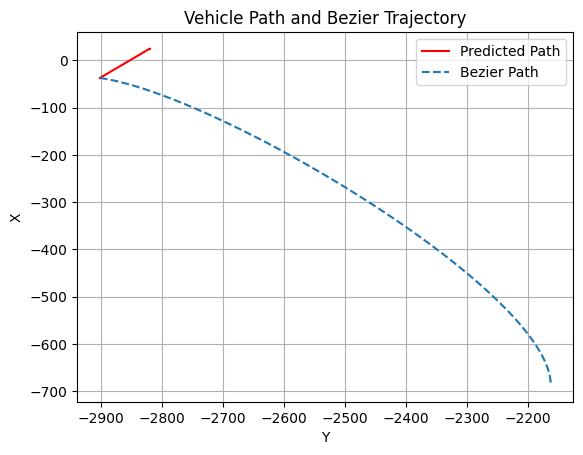

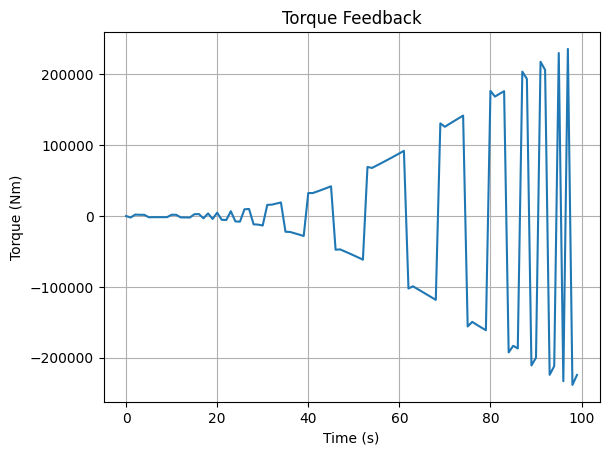

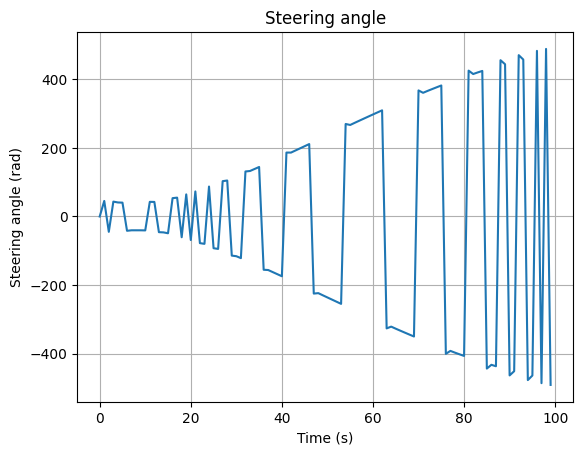

In [10]:
time_step = 1.0
path = path2
param = params2

vehicle_config = Wheel_setting

i_points = P_d[::-1]
f_points = P_f[::-1]
i_yaw = 180 + yaw_d

# Simulation Parameters
# speed = int((f_points[0] - i_points[0]) // 100)
speed = -200
current_position = i_points
current_time = 0

# Haptic Shared Control Initialization
haptic_control = HapticSharedControl(
    Cs=0.5, Kc=0.5, T=2, tp=2, speed=speed, desired_trajectory_params=param, vehicle_config=vehicle_config
)

# Simulation Loop
trajectory = [current_position]
torques = []
steering_angles = [0]
offset_percentage = []
s_angleL = 0
s_angleR = 0

for _ in range(len(path)):
    # print(current_time, current_position, desired_trajectory(current_time), haptic_control.theta_curr)
    # print("\tT:", current_time, "\tP:", current_position, "\tD:", desired_trajectory(current_time), "\tSA:", haptic_control.theta_curr)
    torque, coef, desired_steering_angle  = haptic_control.calculate_torque(
        current_position=current_position,
        steering_wheel_angles=[s_angleL, s_angleR],
        current_yaw_angle=i_yaw,
        t=current_time,
    )

    next_position = haptic_control.predicted_position
    
    trajectory.append(next_position)
    torques.append(torque)
    steering_angles.append(desired_steering_angle)

    current_position = next_position
    s_angleL, s_angleR = desired_steering_angle, desired_steering_angle
    
    current_time += time_step

# Extract trajectory points
trajectory = np.array(trajectory)
x_points = trajectory[:, 0]
y_points = trajectory[:, 1]

# Plot the trajectory

# plt.figure(figsize=(10, 6))
plt.plot(x_points, y_points, label="Predicted Path", color="red")
plt.plot(path[:, 0], path[:, 1], "--", label="Bezier Path")
plt.xlabel("Y")
plt.ylabel("X")
plt.title("Vehicle Path and Bezier Trajectory")
plt.legend()
plt.grid(True)
plt.show()

# plt.figure(figsize=(10, 6))
plt.plot(np.arange(0, current_time, time_step), torques, label="Torque")
plt.xlabel("Time (s)")
plt.ylabel("Torque (Nm)")
plt.title("Torque Feedback")
plt.grid(True)
plt.show()

# plt.figure(figsize=(10, 6))
plt.plot(np.arange(0, current_time, time_step), steering_angles[:-1], label="Steering Angle")
plt.xlabel("Time (s)")
plt.ylabel("Steering angle (rad)")
plt.title("Steering angle")
plt.grid(True)
plt.show()